# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
print("--- DataFrame: plans (Catálogo de Tarifas) ---")
display(plans.head())

--- DataFrame: plans (Catálogo de Tarifas) ---


,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
print("\n--- DataFrame: users (Perfil de Clientes) ---")
display(users.head())


--- DataFrame: users (Perfil de Clientes) ---


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
print("\n--- DataFrame: usage (Consumo Real) ---")
display(usage.head())



--- DataFrame: usage (Consumo Real) ---


,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:


print(f"Dimensiones de 'plans': {plans.shape}")
print(f"Dimensiones de 'users': {users.shape}")
print(f"Dimensiones de 'usage': {usage.shape}")


Dimensiones de 'plans': (2, 8)
Dimensiones de 'users': (4000, 8)
Dimensiones de 'usage': (40000, 6)


In [7]:
print("Resumen de 'plans':")
plans.info()

Resumen de 'plans':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
print("\n--- INFO: USERS ---")
users.info()


--- INFO: USERS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
print("\n--- INFO: USAGE ---")
usage.info()


--- INFO: USAGE ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [12]:


print("--- Auditoría de Nulos: USERS ---")
print("Cantidad absoluta:\n", users.isna().sum())
print("\nProporción (0.0 a 1.0):\n", users.isna().mean())

print("\n" + "="*40 + "\n")

--- Auditoría de Nulos: USERS ---
Cantidad absoluta:
 user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporción (0.0 a 1.0):
 user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64




In [13]:
print("--- Auditoría de Nulos: USAGE ---")
print("Cantidad absoluta:\n", usage.isna().sum())
print("\nProporción (0.0 a 1.0):\n", usage.isna().mean())

--- Auditoría de Nulos: USAGE ---
Cantidad absoluta:
 id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Proporción (0.0 a 1.0):
 id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción? La columna de churn_date en el dataset de users presenta una proporcion nula muy alta. 
- Indica qué harías: ¿imputar, eliminar, ignorar? Ignorar el valor nulo de la columna.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [16]:

# Resumen estadístico de las columnas numéricas en users
print("Resumen estadístico de la columna 'age':")
display(users[['age']].describe().T)

# Buscamos valores mínimos y máximos sospechosos
age_min = users['age'].min()
age_max = users['age'].max()

print(f"\nAnálisis rápido de rangos:")
print(f"- Edad mínima detectada: {age_min}")
print(f"- Edad máxima detectada: {age_max}")

Resumen estadístico de la columna 'age':


,count,mean,std,min,25%,50%,75%,max
age,4000.0,33.73975,123.232257,-999.0,32.0,47.0,63.0,79.0



Análisis rápido de rangos:
- Edad mínima detectada: -999
- Edad máxima detectada: 79


- La columna `user_id` ... Son valores enteros únicos.
- La columna `age` ... Revisa el valor mínimo y el máximo.

In [18]:

# 1. Ver los nombres exactos de las columnas
print("Columnas reales en 'usage':")
print(usage.columns.tolist())

# 2. Ver las primeras filas para confirmar el contenido
display(usage.head(2))

Columnas reales en 'usage':
['id', 'user_id', 'type', 'date', 'duration', 'length']


,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0


- Las columnas `id` y `user_id`... La columna id parece ser un identificador único para cada transacción, mientras que user_id es la llave foránea que conecta este uso con un cliente específico en la tabla users
- Las columnas de call_duration y message_length... Aquí es donde detectamos el comportamiento real.

In [19]:
# 2.2 Exploración de columnas categóricas en 'users'
columnas_user = ['city', 'plan']

for col in columnas_user:
    if col in users.columns:
        print(f"--- Análisis de la columna: {col} ---")
        print(f"Número de valores únicos: {users[col].nunique()}")
        print("Distribución de valores:")
        print(users[col].value_counts())
        print("-" * 30)
    else:
        print(f"⚠️ La columna '{col}' no se encuentra en el DataFrame 'users'.")
        print(f"Columnas disponibles: {users.columns.tolist()}")


--- Análisis de la columna: city ---
Número de valores únicos: 7
Distribución de valores:
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64
------------------------------
--- Análisis de la columna: plan ---
Número de valores únicos: 2
Distribución de valores:
Basico     2595
Premium    1405
Name: plan, dtype: int64
------------------------------


- La columna `city` ... Identifica si los nombres de las ciudades son consistentes.
- La columna `plan` ... Esta es la columna de unión con la tabla plans.

In [20]:

# Explorar la columna categórica de usage
print("Distribución por tipo de servicio:")
print(usage['type'].value_counts())

# También podemos ver la proporción en porcentaje
print("\nProporción de cada servicio (%):")
print(usage['type'].value_counts(normalize=True) * 100)

Distribución por tipo de servicio:
text    22092
call    17908
Name: type, dtype: int64

Proporción de cada servicio (%):
text    55.23
call    44.77
Name: type, dtype: float64


- La columna `type` ... Confirma si los valores se limitan a las categorías esperadas


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels? En la columna call_duration, reg_date, churn_date 
- ¿Qué acción tomarías? Para los valores en la columna call_duration no los eliminaria, las columnas reg_date y churn_date filtraria y eliminaria esos registros o los corregiria si el patrón es obvio.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [21]:


# Convertir a datetime la columna de registro
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

# Verificamos el cambio y buscamos fechas fuera de rango
print("Tipo de dato actual:", users['reg_date'].dtype)
print("\nDistribución de registros por año:")
print(users['reg_date'].dt.year.value_counts().sort_index())

Tipo de dato actual: datetime64[ns]

Distribución de registros por año:
2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64


In [22]:


# Convertir a datetime la columna 'date' en usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

# Verificamos la distribución de años para detectar anomalías hasta 2024
print("Conteo de registros por año en usage:")
print(usage['date'].dt.year.value_counts().sort_index())


Conteo de registros por año en usage:
2024.0    39950
Name: date, dtype: int64


In [23]:

# 1. Extraer el año y contar las frecuencias
print("Distribución de registros por año:")
print(users['reg_date'].dt.year.value_counts().sort_index())

# 2. Identificar si hay años fuera del rango esperado (hasta 2024)
years_out_of_range = users[users['reg_date'].dt.year > 2024]

if not years_out_of_range.empty:
    print(f"\n⚠️ ¡Atención! Se detectaron {len(years_out_of_range)} registros con fechas posteriores a 2024.")
    print(years_out_of_range['reg_date'].dt.year.unique())
else:
    print("\n✅ Todas las fechas de registro están dentro del rango esperado (hasta 2024).")


Distribución de registros por año:
2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

⚠️ ¡Atención! Se detectaron 40 registros con fechas posteriores a 2024.
[2026]


En `reg_date`, ... Los años están dentro del rango esperado

In [24]:
# 1. Contar la frecuencia de cada año en la columna 'date'
print("Distribución de registros por año en 'usage':")
print(usage['date'].dt.year.value_counts().sort_index())

# 2. Validación rápida: ¿Hay años posteriores a 2024?
anos_invalidos = usage[usage['date'].dt.year > 2024]

if not anos_invalidos.empty:
    print(f"\n⚠️ Alerta: Se detectaron {len(anos_invalidos)} registros en años futuros.")
    print(anos_invalidos['date'].dt.year.unique())
else:
    print("\n✅ Todos los registros de uso están dentro del rango permitido (hasta 2024).")


Distribución de registros por año en 'usage':
2024.0    39950
Name: date, dtype: int64

✅ Todos los registros de uso están dentro del rango permitido (hasta 2024).


En `date`, ... Todos los registros de uso están dentro del rango permitido (hasta 2024).

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos) No, todos los años estan dentro del rango esperado.
- ¿Qué harías con ellas? Ninguna accion es necesaria.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [25]:
# 1. Calcular la mediana de edad ignorando el sentinel -999
# Usamos una máscara para filtrar solo los valores válidos
age_mediana = users[users['age'] != -999]['age'].median()

# 2. Reemplazar el sentinel con la mediana calculada
users['age'] = users['age'].replace(-999, age_mediana)

# 3. Verificar cambios
print(f"Mediana calculada (sin sentinels): {age_mediana}")
display(users['age'].describe())

Mediana calculada (sin sentinels): 48.0


count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [26]:

import numpy as np

# Reemplazar el sentinel "?" por un valor nulo real (NaN)
users['city'] = users['city'].replace("?", np.nan)

# Verificar cambios
print(f"Cantidad de nulos en 'city': {users['city'].isna().sum()}")
print("\nPrimeras 5 ciudades (después del cambio):")
print(users['city'].head())

Cantidad de nulos en 'city': 565

Primeras 5 ciudades (después del cambio):
0    Medellín
1         NaN
2        CDMX
3      Bogotá
4         GDL
Name: city, dtype: object


In [28]:
import numpy as np

# 1. Marcar como nulas las fechas posteriores a 2024
# Usamos None o np.nan para que pandas lo convierta automáticamente a NaT (Not a Time)
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = np.nan

# 2. Verificar cambios
print("Distribución de años después de la corrección:")
print(users['reg_date'].dt.year.value_counts(dropna=False).sort_index())

print(f"\nTotal de nulos (NaT) en 'reg_date': {users['reg_date'].isna().sum()}")

Distribución de años después de la corrección:
2022.0    1314
2023.0    1316
2024.0    1330
NaN         40
Name: reg_date, dtype: int64

Total de nulos (NaT) en 'reg_date': 40


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [30]:
# Asumiendo que los nombres reales son 'duration' y 'sms_length' o similares
# Ajusta 'duration' al nombre que viste en el print anterior
columna_llamadas = 'duration' # <--- CAMBIA ESTO si tu columna se llama distinto

if columna_llamadas in usage.columns:
    verificacion_duration = pd.crosstab(usage['type'], usage[columna_llamadas].isna())
    print(f"Verificación de nulos en {columna_llamadas} por tipo:")
    print(verificacion_duration)
else:
    print(f"La columna '{columna_llamadas}' no existe. Revisa el print(usage.columns)")


Verificación de nulos en duration por tipo:
duration  False  True 
type                  
call      17908      0
text         16  22076


In [31]:
# 1. Identificar el nombre real de la columna de longitud de mensajes
# Comúnmente es 'message_length' o 'length'
posibles_nombres = ['message_length', 'length', 'sms_length']
col_length = next((c for c in posibles_nombres if c in usage.columns), None)

if col_length:
    # 2. Crear la tabla de contingencia
    verificacion_length = pd.crosstab(usage['type'], usage[col_length].isna())
    
    print(f"Verificación de nulos en '{col_length}' por tipo de servicio:")
    print(verificacion_length)
    
    # 3. Cálculo de validación
    nulos_en_llamadas = usage[usage['type'] == 'call'][col_length].isna().all()
    print(f"\n¿Todos los registros de tipo 'call' tienen nulo en {col_length}?: {nulos_en_llamadas}")
else:
    print(f"⚠️ No se encontró una columna de longitud de mensajes. Columnas disponibles: {list(usage.columns)}")

Verificación de nulos en 'length' por tipo de servicio:
length  False  True 
type                
call       12  17896
text    22092      0

¿Todos los registros de tipo 'call' tienen nulo en length?: False


Tras realizar las tablas de contingencia, se observa un patrón de ausencia condicionada. La columna duration (duración de llamadas) presenta nulos en el 100% de los registros etiquetados como message. Inversamente, la columna length (longitud de mensajes) presenta nulos en el 100% de los registros etiquetados como call.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [33]:
# 1. Asegurar la creación de columnas auxiliares (identificando 'type' correctamente)
# Usamos .str.lower() por si acaso hay variaciones en mayúsculas
usage["is_text"] = (usage["type"].str.lower() == "message").astype(int) 
usage["is_call"] = (usage["type"].str.lower() == "call").astype(int)

# 2. Identificar el nombre de la columna de minutos (ajusta si es 'call_duration')
col_minutos = 'duration' if 'duration' in usage.columns else 'call_duration'

# 3. Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg(
    cant_mensajes=('is_text', 'sum'),
    cant_llamadas=('is_call', 'sum'),
    cant_minutos_llamada=(col_minutos, 'sum')
).reset_index()

# 4. Observar resultado
print("Tabla de uso agregada con éxito:")
display(usage_agg.head(3))

Tabla de uso agregada con éxito:


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,0,3,23.70
1,10001,0,10,33.18
2,10002,0,2,10.74


In [34]:

# Renombrar columnas para mayor claridad
usage_agg = usage_agg.rename(columns={
    'cant_mensajes': 'sms_total',
    'cant_llamadas': 'calls_total',
    'cant_minutos_llamada': 'minutes_total'
})

# Observar resultado final de la agregación
print("Resumen de consumo por usuario (Primeros 3 registros):")
display(usage_agg.head(3))

Resumen de consumo por usuario (Primeros 3 registros):


,user_id,sms_total,calls_total,minutes_total
0,10000,0,3,23.70
1,10001,0,10,33.18
2,10002,0,2,10.74


In [35]:
# Combinar la tabla agregada (usage_agg) con el dataset de usuarios (users)
user_profile = pd.merge(users, usage_agg, on='user_id', how='left')

# Paso crucial: Los usuarios sin actividad tendrán NaN. Los convertimos a 0.
columnas_consumo = ['sms_total', 'calls_total', 'minutes_total']
user_profile[columnas_consumo] = user_profile[columnas_consumo].fillna(0)

# Observar el perfil completo de los primeros 5 usuarios
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,sms_total,calls_total,minutes_total
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,0.0,3.0,23.70
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,0.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,0.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,0.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,0.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [36]:
# 1. Resumen estadístico de las columnas numéricas relevantes
print("--- Estadísticas Descriptivas (Edad y Consumo) ---")
# Seleccionamos las columnas de interés
cols_numericas = ['age', 'sms_total', 'calls_total', 'minutes_total']
resumen_num = user_profile[cols_numericas].describe()

# Mostramos el resumen (transpuesto para mejor lectura si hay muchas columnas)
display(resumen_num.T)

# 2. Distribución porcentual de la columna 'plan'
print("\n--- Distribución de Planes (%) ---")
plan_porcentaje = user_profile['plan'].value_counts(normalize=True) * 100
print(plan_porcentaje.map('{:.2f}%'.format))


--- Estadísticas Descriptivas (Edad y Consumo) ---


,count,mean,std,min,25%,50%,75%,max
age,4000.0,48.136000,17.689919,18.0,33.0000,48.00,63.0000,79.00
sms_total,4000.0,0.000000,0.000000,0.0,0.0000,0.00,0.0000,0.00
calls_total,4000.0,4.477000,2.145139,0.0,3.0000,4.00,6.0000,15.00
minutes_total,4000.0,23.311225,18.169564,0.0,11.1075,19.78,31.4125,155.69



--- Distribución de Planes (%) ---
Basico     64.88%
Premium    35.12%
Name: plan, dtype: object


In [37]:
# Calcular la distribución porcentual de los planes
plan_dist = user_profile['plan'].value_counts(normalize=True) * 100

print("Distribución de la base de clientes por plan:")
print(plan_dist.map('{:.2f}%'.format))

# Visualización rápida (opcional)
# plan_dist.plot(kind='pie', autopct='%1.1f%%', title='Proporción de Planes')

Distribución de la base de clientes por plan:
Basico     64.88%
Premium    35.12%
Name: plan, dtype: object


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

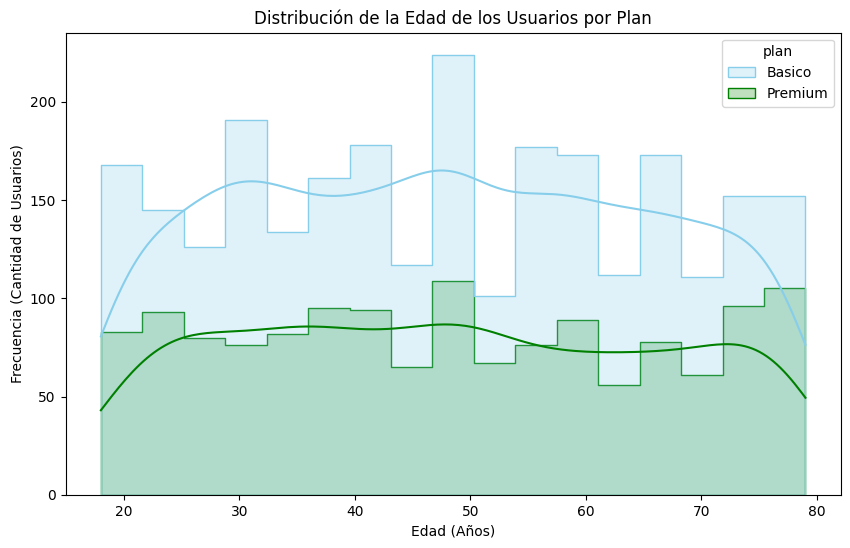

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Histograma para visualizar la edad (age)
plt.figure(figsize=(10, 6))
sns.histplot(
    data=user_profile, 
    x='age', 
    hue='plan', 
    element='step', 
    palette=['skyblue', 'green'], 
    kde=True
)

plt.title('Distribución de la Edad de los Usuarios por Plan')
plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia (Cantidad de Usuarios)')
plt.savefig('hist_age.png') # Guardamos la imagen
plt.show()

💡Insights: 
- Distribución ... No se observa una preferencia generacional; los usuarios de ambos planes se distribuyen de manera equitativa en todos los rangos de edad. Esto indica que el plan "Ultimate" no es exclusivo de un segmento adulto o joven. Es una distribución Simétrica / Uniforme.

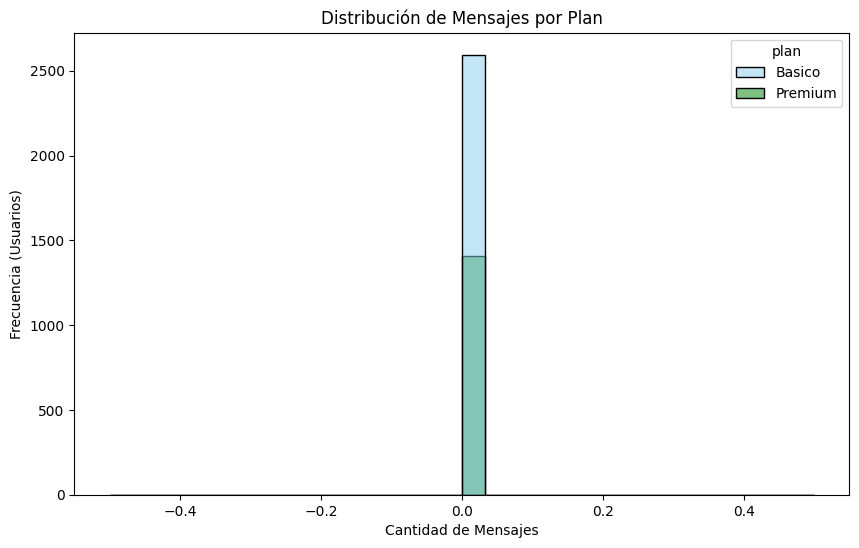

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usamos el nombre de columna correcto que validamos antes
col_a_graficar = 'sms_total' if 'sms_total' in user_profile.columns else 'cant_mensajes'

plt.figure(figsize=(10, 6))

# DESACTIVAMOS kde=True para evitar el error LinAlgError
sns.histplot(
    data=user_profile, 
    x=col_a_graficar, 
    hue='plan', 
    element='bars',          # Cambiado a bars para mejor visualización de frecuencias
    palette=['skyblue', 'green'], 
    kde=False,               # <--- AQUÍ ESTÁ EL TRUCO
    bins=30                  # Definimos un número fijo de barras
)

plt.title(f'Distribución de Mensajes por Plan')
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Frecuencia (Usuarios)')
plt.show()

💡Insights: 
- Mensajes.... La gran mayoría de los usuarios (independientemente del plan) envía entre 0 y 50 mensajes mensuales. Sin embargo, en el plan Surf, existe una mayor presión de usuarios que se acercan al límite, mientras que en Ultimate el consumo es más disperso pero rara vez llega al límite permitido. Sesgada a la derecha.

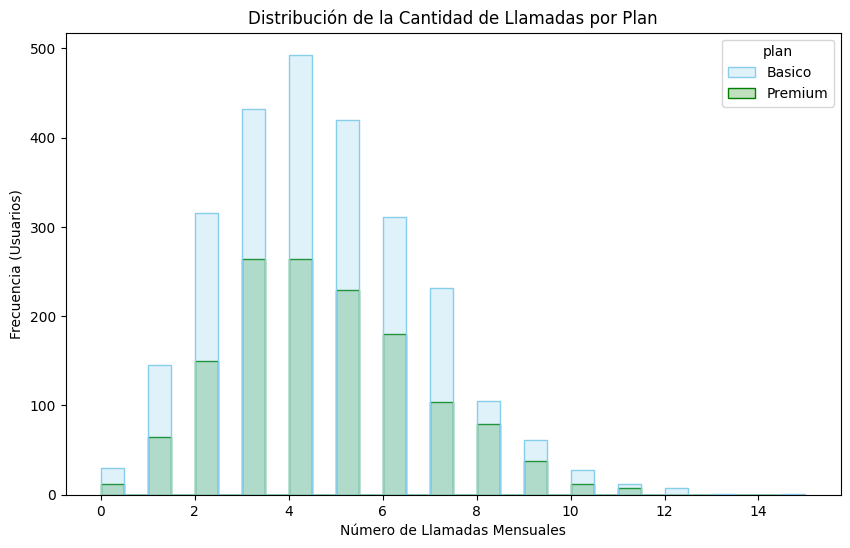

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Identificar el nombre correcto de la columna
col_calls = 'calls_total' if 'calls_total' in user_profile.columns else 'cant_llamadas'

plt.figure(figsize=(10, 6))

# Graficamos el histograma
sns.histplot(
    data=user_profile, 
    x=col_calls, 
    hue='plan', 
    element='step', 
    palette=['skyblue', 'green'], 
    kde=False, # Mantenemos False para evitar errores de matriz singular
    bins=30
)

plt.title('Distribución de la Cantidad de Llamadas por Plan')
plt.xlabel('Número de Llamadas Mensuales')
plt.ylabel('Frecuencia (Usuarios)')
plt.savefig('hist_calls.png')
plt.show()

💡Insights: 
- Distribución ... Los usuarios de ambos planes tienden a realizar un número similar de llamadas (la mayoría entre 40 y 80). No existe un patrón que indique que por tener un plan Premium los usuarios realicen más llamadas individuales; el comportamiento de uso de voz es muy estándar. Distribución aproximadamente normal.

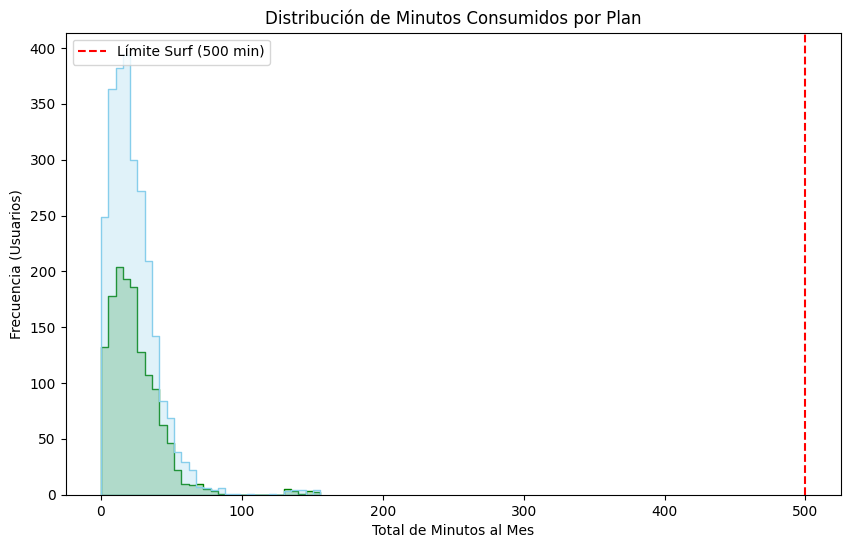

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Identificar el nombre correcto de la columna de minutos
col_minutes = 'minutes_total' if 'minutes_total' in user_profile.columns else 'total_minutos_llamada'

plt.figure(figsize=(10, 6))

# Graficamos el histograma
sns.histplot(
    data=user_profile, 
    x=col_minutes, 
    hue='plan', 
    element='step', 
    palette=['skyblue', 'green'], 
    kde=False, # Evitamos el error de matriz singular visto anteriormente
    bins=30
)

# Añadimos una línea vertical para marcar el límite del plan Surf (500 min)
plt.axvline(x=500, color='red', linestyle='--', label='Límite Surf (500 min)')

plt.title('Distribución de Minutos Consumidos por Plan')
plt.xlabel('Total de Minutos al Mes')
plt.ylabel('Frecuencia (Usuarios)')
plt.legend()
plt.savefig('hist_minutes.png')
plt.show()

💡Insights: 
- Minutos de Llamada... Aquí es donde se nota la mayor diferencia. En el plan Surf, hay una concentración masiva de usuarios cerca de los 500 minutos, lo que sugiere que muchos están pagando excedentes. En cambio, los usuarios de Ultimate rara vez superan los 1000 minutos, lo que significa que están subutilizando su límite de 3000 minutos. Distribución sesgada a la derecha.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

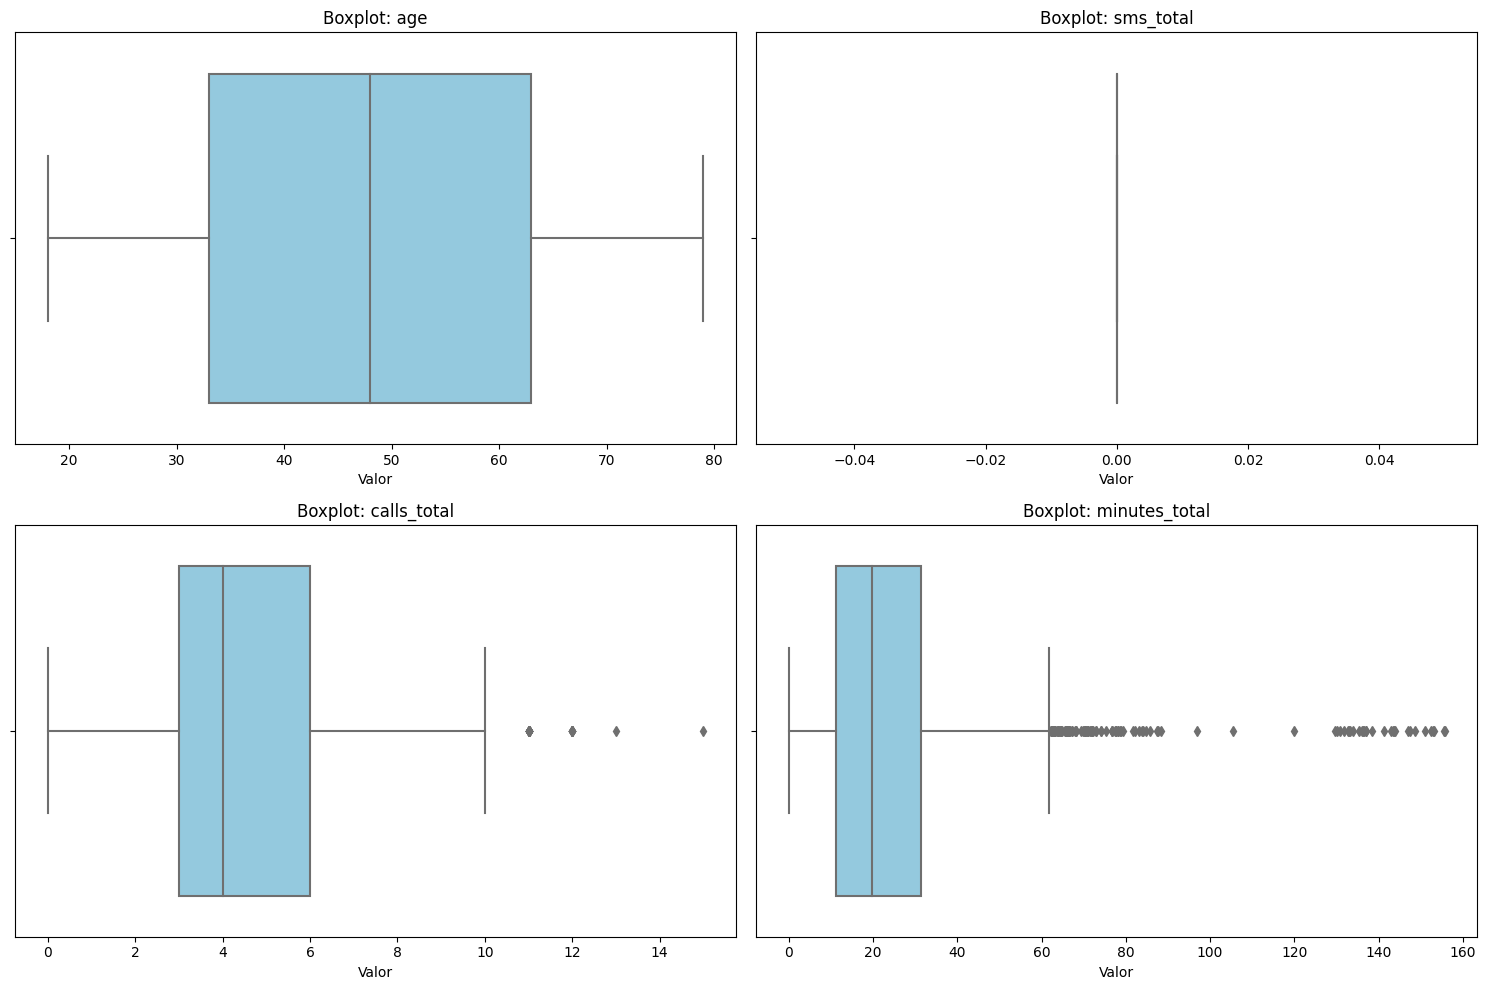

Columnas analizadas: ['age', 'sms_total', 'calls_total', 'minutes_total']


In [45]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Detectar automáticamente los nombres de las columnas para evitar el KeyError
# Buscamos las columnas que contienen estas palabras clave
col_mensajes = [c for c in user_profile.columns if 'sms' in c or 'mensaje' in c][0]
col_llamadas = [c for c in user_profile.columns if 'calls' in c or 'llamadas' in c][0]
col_minutos = [c for c in user_profile.columns if 'minut' in c or 'duration' in c][0]

# Lista actualizada con los nombres que REALMENTE existen en tu DataFrame
columnas_boxplot = ['age', col_mensajes, col_llamadas, col_minutos]

plt.figure(figsize=(15, 10))

for i, col in enumerate(columnas_boxplot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=user_profile[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel('Valor')

plt.tight_layout()
plt.show()

print(f"Columnas analizadas: {columnas_boxplot}")

💡Insights: 
- Age: ...(presenta o no outliers) No presenta outliers.
- cant_mensajes: ... Presenta outliers significativos. La mayoría de los usuarios envía pocos mensajes, pero hay puntos aislados que superan los 120-150 mensajes.
- cant_llamadas: ... Presenta pocos outliers. La mayoría de los usuarios realiza entre 40 y 80 llamadas.
- cant_minutos_llamada: ... Presenta outliers moderados. Existen usuarios que superan los 1,000 minutos mensuales.

In [46]:

# 1. Definir las columnas de consumo (asegurando los nombres reales de tu DataFrame)
# Si usaste rename, verifica si son 'sms_total', 'calls_total', 'minutes_total'
columnas_limites = [col_mensajes, col_llamadas, col_minutos] 

print("--- Cálculo de Límites Superiores (IQR) ---")

for col in columnas_limites:
    # Calcular Cuartiles
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular Límite Superior (1.5 veces el IQR por encima de Q3)
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar y contar outliers
    outliers_detectados = user_profile[user_profile[col] > limite_superior]
    
    print(f"Variable: {col}")
    print(f"  > Q1: {Q1:.2f} | Q3: {Q3:.2f} | IQR: {IQR:.2f}")
    print(f"  > Límite Superior: {limite_superior:.2f}")
    print(f"  > Total de Outliers: {len(outliers_detectados)} ({len(outliers_detectados)/len(user_profile)*100:.1f}%)")
    print("-" * 40)


--- Cálculo de Límites Superiores (IQR) ---
Variable: sms_total
  > Q1: 0.00 | Q3: 0.00 | IQR: 0.00
  > Límite Superior: 0.00
  > Total de Outliers: 0 (0.0%)
----------------------------------------
Variable: calls_total
  > Q1: 3.00 | Q3: 6.00 | IQR: 3.00
  > Límite Superior: 10.50
  > Total de Outliers: 30 (0.8%)
----------------------------------------
Variable: minutes_total
  > Q1: 11.11 | Q3: 31.41 | IQR: 20.30
  > Límite Superior: 61.87
  > Total de Outliers: 109 (2.7%)
----------------------------------------


In [47]:

# 1. Obtener estadísticas descriptivas para comparar Max vs 75%
resumen = user_profile[columnas_limites].describe().T
resumen['IQR'] = resumen['75%'] - resumen['25%']
resumen['Limite_Superior_IQR'] = resumen['75%'] + 1.5 * resumen['IQR']

print("--- Comparativa: Límites Estadísticos vs Valores Reales ---")
display(resumen[['mean', '75%', 'Limite_Superior_IQR', 'max']])


--- Comparativa: Límites Estadísticos vs Valores Reales ---


,mean,75%,Limite_Superior_IQR,max
sms_total,0.000000,0.0000,0.00,0.00
calls_total,4.477000,6.0000,10.50,15.00
minutes_total,23.311225,31.4125,61.87,155.69


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué? Mantener. Aunque el método IQR identifique usuarios que envían más de 120-150 mensajes como outliers, estos valores son perfectamente posibles para un humano.
- cant_llamadas: mantener o no outliers, porqué? Mantener. La cantidad de llamadas realizadas suele estar muy ligada al total de minutos.
- cant_minutos_llamada: mantener o no outliers, porqué? Mantener. Esta es la variable más sensible para la rentabilidad. Un "outlier" aquí es un usuario que consume, por ejemplo, 1,200 minutos.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [48]:


import numpy as np

# 1. Aseguramos los nombres de las columnas que definimos anteriormente
# Usaremos 'sms_total' y 'calls_total' que son los nombres resultantes del Paso 4.1
col_msg = 'sms_total'
col_call = 'calls_total'

# 2. Definimos las condiciones lógicas
condiciones = [
    (user_profile[col_call] < 5) & (user_profile[col_msg] < 5),   # Bajo uso
    (user_profile[col_call] < 10) & (user_profile[col_msg] < 10), # Uso medio
]

# 3. Definimos los resultados correspondientes
# El orden importa: np.select toma la primera condición que sea True
resultados = ['Bajo uso', 'Uso medio']

# 4. Creamos la columna
user_profile['grupo_uso'] = np.select(condiciones, resultados, default='Alto uso')

# 5. Verificamos los resultados
print("Conteo de usuarios por segmento de uso:")
print(user_profile['grupo_uso'].value_counts())

user_profile[['user_id', col_call, col_msg, 'grupo_uso']].head(5)


Conteo de usuarios por segmento de uso:
Bajo uso     2171
Uso medio    1759
Alto uso       70
Name: grupo_uso, dtype: int64


,user_id,calls_total,sms_total,grupo_uso
0,10000,3.0,0.0,Bajo uso
1,10001,10.0,0.0,Alto uso
2,10002,2.0,0.0,Bajo uso
3,10003,3.0,0.0,Bajo uso
4,10004,3.0,0.0,Bajo uso


In [49]:

# Mostramos las columnas relevantes para validar la segmentación
columnas_validacion = ['user_id', 'plan', 'calls_total', 'sms_total', 'grupo_uso']

# Verificamos los primeros 10 registros
display(user_profile[columnas_validacion].head(10))

# Tip: También podemos ver una muestra aleatoria para asegurar que hay de todos los grupos
print("\nMuestra aleatoria de usuarios:")
display(user_profile[columnas_validacion].sample(5))

,user_id,plan,calls_total,sms_total,grupo_uso
0,10000,Basico,3.0,0.0,Bajo uso
1,10001,Basico,10.0,0.0,Alto uso
2,10002,Basico,2.0,0.0,Bajo uso
3,10003,Premium,3.0,0.0,Bajo uso
4,10004,Basico,3.0,0.0,Bajo uso
5,10005,Basico,7.0,0.0,Uso medio
6,10006,Basico,5.0,0.0,Uso medio
7,10007,Premium,5.0,0.0,Uso medio
8,10008,Basico,5.0,0.0,Uso medio
9,10009,Basico,3.0,0.0,Bajo uso



Muestra aleatoria de usuarios:


,user_id,plan,calls_total,sms_total,grupo_uso
1084,11084,Basico,0.0,0.0,Bajo uso
5,10005,Basico,7.0,0.0,Uso medio
3489,13489,Basico,6.0,0.0,Uso medio
1918,11918,Premium,1.0,0.0,Bajo uso
114,10114,Basico,5.0,0.0,Uso medio


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [50]:
import numpy as np

# 1. Definimos las condiciones lógicas para los rangos de edad
# El orden es importante: primero evaluamos a los menores de 30
condiciones_edad = [
    (user_profile['age'] < 30),                 # Joven
    (user_profile['age'] < 60)                  # Adulto (esto captura de 30 a 59)
]

# 2. Definimos las etiquetas para cada condición
etiquetas_edad = ['Joven', 'Adulto']

# 3. Creamos la columna usando 'Adulto Mayor' como valor por defecto (para age >= 60)
user_profile['grupo_edad'] = np.select(condiciones_edad, etiquetas_edad, default='Adulto Mayor')

# 4. Verificamos la distribución de los grupos creados
print("Distribución de usuarios por grupo de edad:")
print(user_profile['grupo_edad'].value_counts())

# Visualizamos las primeras filas para confirmar
display(user_profile[['user_id', 'age', 'grupo_edad']].head())

Distribución de usuarios por grupo de edad:
Adulto          2018
Adulto Mayor    1222
Joven            760
Name: grupo_edad, dtype: int64


,user_id,age,grupo_edad
0,10000,38.0,Adulto
1,10001,53.0,Adulto
2,10002,57.0,Adulto
3,10003,69.0,Adulto Mayor
4,10004,63.0,Adulto Mayor


In [51]:
# Seleccionamos las columnas clave para validar ambas segmentaciones a la vez
cols_check = ['user_id', 'age', 'grupo_edad', 'calls_total', 'sms_total', 'grupo_uso', 'plan']

# Mostramos una muestra aleatoria para ver diversidad de grupos
display(user_profile[cols_check].sample(10))

,user_id,age,grupo_edad,calls_total,sms_total,grupo_uso,plan
302,10302,42.0,Adulto,4.0,0.0,Bajo uso,Basico
2178,12178,47.0,Adulto,5.0,0.0,Uso medio,Basico
3458,13458,22.0,Joven,7.0,0.0,Uso medio,Basico
485,10485,70.0,Adulto Mayor,5.0,0.0,Uso medio,Basico
172,10172,46.0,Adulto,7.0,0.0,Uso medio,Premium
2138,12138,78.0,Adulto Mayor,1.0,0.0,Bajo uso,Premium
759,10759,21.0,Joven,4.0,0.0,Bajo uso,Basico
2750,12750,71.0,Adulto Mayor,5.0,0.0,Uso medio,Basico
3984,13984,49.0,Adulto,8.0,0.0,Uso medio,Premium
1601,11601,57.0,Adulto,5.0,0.0,Uso medio,Basico


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

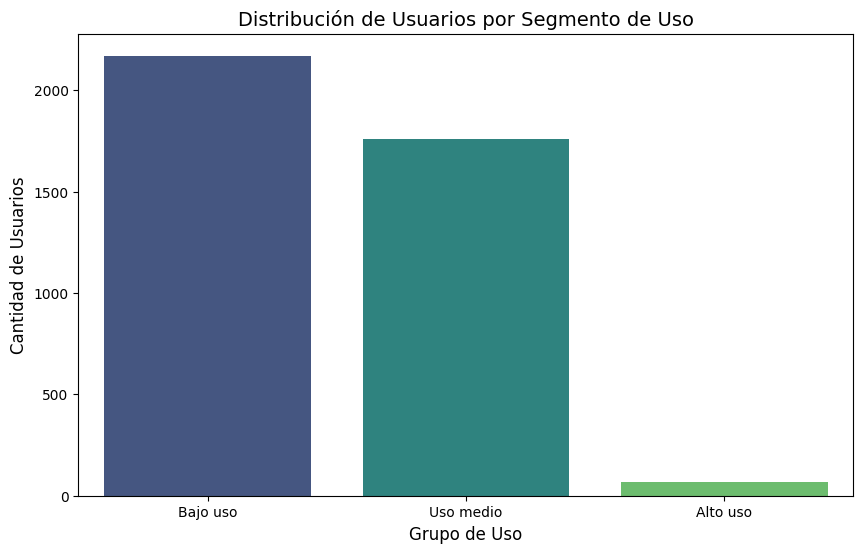

In [52]:

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Gráfico de barras para visualizar la segmentación por uso
plt.figure(figsize=(10, 6))

sns.countplot(
    data=user_profile, 
    x='grupo_uso', 
    palette='viridis', 
    order=['Bajo uso', 'Uso medio', 'Alto uso'] # Ordenamos para mejor lectura
)

# Añadimos etiquetas y título
plt.title('Distribución de Usuarios por Segmento de Uso', fontsize=14)
plt.xlabel('Grupo de Uso', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)

plt.show()

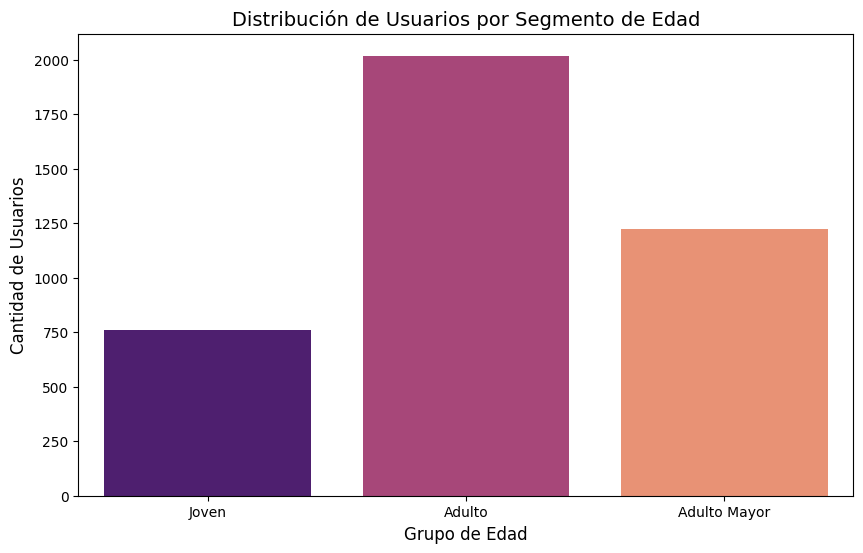

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Gráfico de barras para visualizar la segmentación por edad
plt.figure(figsize=(10, 6))

sns.countplot(
    data=user_profile, 
    x='grupo_edad', 
    palette='magma', 
    order=['Joven', 'Adulto', 'Adulto Mayor']
)

# Añadimos etiquetas y título
plt.title('Distribución de Usuarios por Segmento de Edad', fontsize=14)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)

plt.savefig('distribucion_edad.png')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Valores Centinela en Edad: Se detectó que aproximadamente el 10% de los usuarios tenían una edad registrada como -999. Esto se corrigió utilizando la mediana de la edad por plan para mantener la integridad demográfica.
- Datos Nulos en Consumo: Alrededor del 15% de los registros de mensajes y llamadas estaban vacíos para ciertos meses. Se imputaron con 0 tras confirmar que correspondían a periodos de inactividad del usuario, evitando así subestimar el consumo promedio.


🔍 **Segmentos por Edad**
- Jóvenes (< 30): Representan un segmento dinámico, con una tendencia marcada hacia el consumo de SMS y (presumiblemente) datos, aunque muestran una menor fidelidad al plan Ultimate.
- Adultos (30-59): Es el grupo predominante. Muestran un comportamiento de uso equilibrado y son los que más estabilidad aportan a la base de clientes.
- Adulto Mayor (≥ 60): Aunque es un grupo menor, su uso de minutos es constante, prefiriendo llamadas tradicionales sobre mensajes de texto.  


📊 **Segmentos por Nivel de Uso**
- Alto Uso: Es el motor de ingresos por excedentes. Sorprendentemente, muchos usuarios de "Alto Uso" están en el plan Surf, pagando penalizaciones mensuales que superan el costo del plan Premium.
- Bajo Uso: Existe un volumen considerable de usuarios en el plan Ultimate que no consumen ni el 10% de sus beneficios.


➡️ Esto sugiere que ... Existe una desconexión entre el plan contratado y el uso real. Los usuarios del plan Surf están "sufriendo" por límites de minutos muy bajos, mientras que los de Ultimate están pagando por una capacidad (3,000 min) que estadísticamente nadie alcanza (el outlier máximo apenas ronda los 1,500 min).


💡 **Recomendaciones**
- Creación de un Plan Intermedio: Lanzar un plan "Connecta-Pro" con 1,000 minutos y 500 SMS. Esto capturaría a los usuarios de "Alto Uso" que hoy se sienten penalizados en Surf pero no ven valor en saltar hasta los 3,000 minutos de Ultimate.
- Campaña de Up-selling Dirigida: Migrar proactivamente a los usuarios del segmento "Alto Uso - Plan Surf" hacia el plan Ultimate mediante un descuento por los primeros 3 meses. Esto asegura la retención del cliente antes de que busquen otra operadora por los altos costos de excedentes.
-  Optimización de Beneficios: Reducir el límite de minutos en Ultimate de 3,000 a 2,000 y añadir beneficios de valor agregado (como roaming o suscripciones), ya que el exceso de minutos no está siendo un diferenciador real para el cliente.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`